In [98]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [78]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=[data.feature_names])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
# Set target labels 0 == Cancer, 1 == Non-cancer
df["Target"] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [80]:
# Split data into X and y vars, X contains all of the features and y contains all of the target variables
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [81]:
# Preprocessing data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [82]:
# Build logistic regression
model = LogisticRegression().fit(X_train_scaled, y_train)

In [83]:
y_preds = model.predict(X_test_scaled)

In [84]:
print(y_test)
print('\n******\n')
print(y_preds)

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1]

******

[1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1]


In [85]:
# Build confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)

print(confusion_matrix)

[[52  2]
 [ 1 88]]


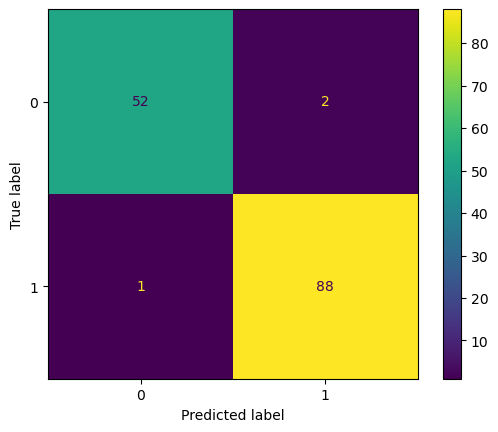

In [87]:
confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
confusion_matrix_display.plot()

plt.show()
# Top left true positives
# Bottom left false positives == model thought something was cancerous and it wasn't
# Top right false negatives == model thought something was non-cancerous and it was!
# Bottom right true negatives 

In [97]:
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Precision: {precision_score(y_test, y_preds)}") # how often a model was correct when predicting positive
print(f"Recall: {recall_score(y_test, y_preds)}") #how often the model was able to identify  true positives out of all of the positives there were

Accuracy: 0.9790209790209791
Precision: 0.9777777777777777
Recall: 0.9887640449438202
